# Exploratory data analysis

### 1. Importing libraries for EDA

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Loading datasdsets

In [29]:
print('1. Cab_Data')
cab = pd.read_csv("Cab_Data.csv")
print(cab.head(5))

print('\n2. City')
city = pd.read_csv("City.csv")
print(city.head(5))

print('\n3. Customer_ID')
c_id = pd.read_csv("Customer_ID.csv")
print(c_id.head(5))

print('\n4. Transaction_ID')
t_id = pd.read_csv("Transaction_ID.csv")
print(t_id.head(5))

1. Cab_Data
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

2. City
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 

3. Customer_ID
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28 

In [30]:
# make two list for loop
datasets_lst = ['1. Cab_Data', '2. City', '3. Customer_ID', '4. Transaction_ID']
datasets = [cab, city, c_id, t_id]

In [31]:
for idx in range(len(datasets)):
    print(datasets_lst[idx])
    print(datasets[idx].shape)
    print('')

1. Cab_Data
(359392, 7)

2. City
(20, 3)

3. Customer_ID
(49171, 4)

4. Transaction_ID
(440098, 3)



### 3. Checking types

In [32]:
for idx in range(len(datasets)):
    print(datasets_lst[idx])
    print(datasets[idx].dtypes)
    print('')

1. Cab_Data
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

2. City
City          object
Population    object
Users         object
dtype: object

3. Customer_ID
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

4. Transaction_ID
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object



### 4. Rename columns

In [33]:
print('1. Cab_Data')
cab = cab.rename(columns={"Transaction ID": "T_ID", "Date of Travel": "Date", "KM Travelled": "Km", 
                         "Price Charged": "Price", "Cost of Trip": "Cost"})
print(cab.head(5))

print('\n3. Customer_ID')
c_id = c_id.rename(columns={"Customer ID": "C_ID", "Income (USD/Month)": "Income"})
print(c_id.head(5))

print('\n4. Transaction_ID')
t_id = t_id.rename(columns={"Transaction ID": "T_ID", "Customer ID": "C_ID", "Payment_Mode": "Payment"})
print(t_id.head(5))

1. Cab_Data
       T_ID   Date   Company        City     Km   Price     Cost
0  10000011  42377  Pink Cab  ATLANTA GA  30.45  370.95  313.635
1  10000012  42375  Pink Cab  ATLANTA GA  28.62  358.52  334.854
2  10000013  42371  Pink Cab  ATLANTA GA   9.04  125.20   97.632
3  10000014  42376  Pink Cab  ATLANTA GA  33.17  377.40  351.602
4  10000015  42372  Pink Cab  ATLANTA GA   8.73  114.62   97.776

3. Customer_ID
    C_ID Gender  Age  Income
0  29290   Male   28   10813
1  27703   Male   27    9237
2  28712   Male   53   11242
3  28020   Male   23   23327
4  27182   Male   33    8536

4. Transaction_ID
       T_ID   C_ID Payment
0  10000011  29290    Card
1  10000012  27703    Card
2  10000013  28712    Cash
3  10000014  28020    Cash
4  10000015  27182    Card


### 5. Change formats

In [34]:
# The format of date type in Cab_Data dataset need to change from 5 digit to mm-dd-yyyy.
import datetime

def digit_to_date(digits):
    new_date = []
    for digit in digits:
        x = datetime.date(1899,12,30) + datetime.timedelta(days=digit)
        new_date.append(x.strftime('%Y-%m-%d'))
    return new_date
cab['Date'] = pd.to_datetime(digit_to_date(cab['Date']), format='%Y-%m-%d')
print(cab.head(5))
print('')
print('First date: ', cab.Date.min(), 'Last date: ', cab.Date.max())

       T_ID       Date   Company        City     Km   Price     Cost
0  10000011 2016-01-08  Pink Cab  ATLANTA GA  30.45  370.95  313.635
1  10000012 2016-01-06  Pink Cab  ATLANTA GA  28.62  358.52  334.854
2  10000013 2016-01-02  Pink Cab  ATLANTA GA   9.04  125.20   97.632
3  10000014 2016-01-07  Pink Cab  ATLANTA GA  33.17  377.40  351.602
4  10000015 2016-01-03  Pink Cab  ATLANTA GA   8.73  114.62   97.776

First date:  2016-01-02 00:00:00 Last date:  2018-12-31 00:00:00


In [35]:
# The formats of Population and User need to change from object to integer.
city['Population'] = [obj.replace(',', '') for obj in city['Population']]
city['Population'] = city['Population'].astype(int)

city['Users'] = [obj.replace(',', '') for obj in city['Users']]
city['Users'] = city['Users'].astype(int)

print(city.head(5))
print('')
print(city.dtypes)

             City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247

City          object
Population     int64
Users          int64
dtype: object


### 6. Check duplicate rows

In [36]:
for idx in range(len(datasets)):
    print(datasets_lst[idx])
    print(datasets[idx].shape)
    tmp_df = datasets[idx][datasets[idx].duplicated()]
    print("total number of duplicated rows: ", tmp_df.shape)
    print('')

1. Cab_Data
(359392, 7)
total number of duplicated rows:  (0, 7)

2. City
(20, 3)
total number of duplicated rows:  (0, 3)

3. Customer_ID
(49171, 4)
total number of duplicated rows:  (0, 4)

4. Transaction_ID
(440098, 3)
total number of duplicated rows:  (0, 3)



### 7. Check missing or null values

In [37]:
for idx in range(len(datasets)):
    print(datasets_lst[idx])
    print(datasets[idx].isnull().sum())
    print('')

1. Cab_Data
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

2. City
City          0
Population    0
Users         0
dtype: int64

3. Customer_ID
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

4. Transaction_ID
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64



### 8. Plot different features

#### Assumption: Market share
One of the two cab companies has a higher market share in terms of the number of customers and revenue.

In [46]:
## add columns needed
cab['cost_km'] = cab['Cost'] / cab['Km']
cab['profit'] = cab['Price'] - cab['Cost']

In [49]:
cab.merge(t_id, on='T_ID').groupby('Company')['C_ID'].unique()

Company
Pink Cab      [29290, 27703, 28712, 28020, 27182, 27318, 337...
Yellow Cab    [27602, 27594, 27884, 28533, 29039, 28102, 294...
Name: C_ID, dtype: object

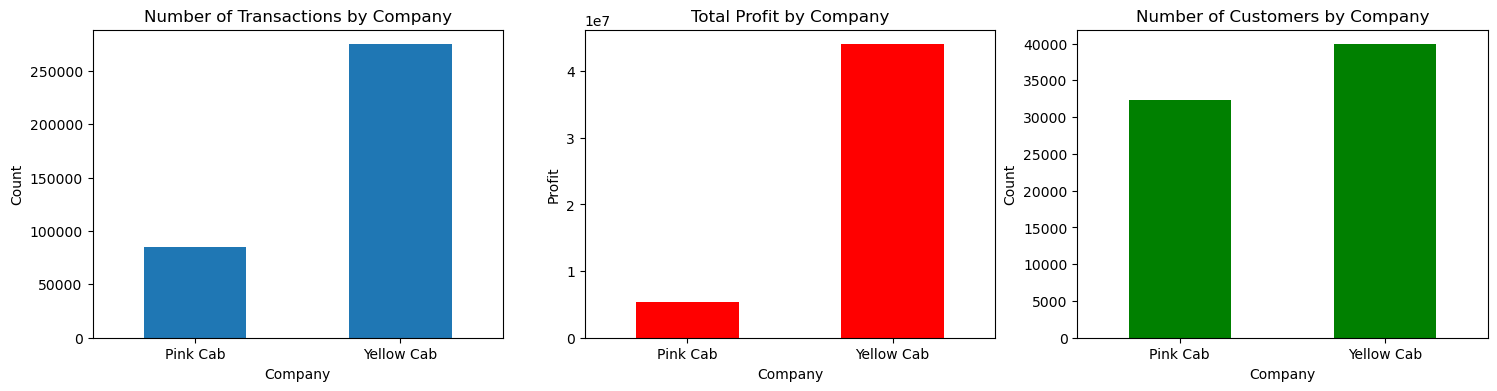

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

cab.groupby('Company')['Company'].count().plot(kind='bar', ax=axs[0])
axs[0].set_title("Number of Transactions by Company")
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(['Pink Cab', 'Yellow Cab'], rotation=0)

cab.groupby('Company')['profit'].sum().plot(kind='bar', color='r', ax=axs[1])
axs[1].set_title("Total Profit by Company")
axs[1].set_ylabel('Profit')
axs[1].set_xticklabels(['Pink Cab', 'Yellow Cab'], rotation=0)

cab.merge(t_id, on='T_ID').groupby('Company')['C_ID'].nunique().plot(kind='bar', color='green', ax=axs[2])
axs[2].set_title("Number of Customers by Company")
axs[2].set_ylabel('Count')
axs[2].set_xticklabels(['Pink Cab', 'Yellow Cab'], rotation=0)

plt.show()

#### Assumption: Customer demographics and Payment methods
Certain demographic factors, such as age, income, and gender, influence the choice of cab company.
The choice of payment method (cash, credit card) affects customer preference for a cab company.

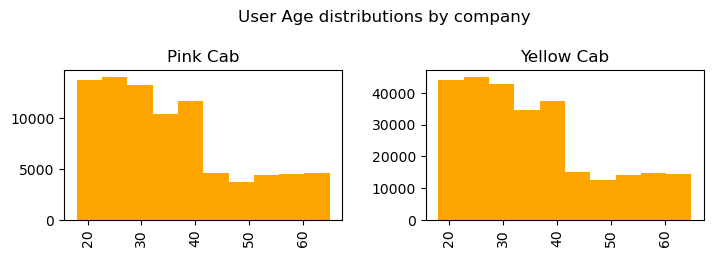

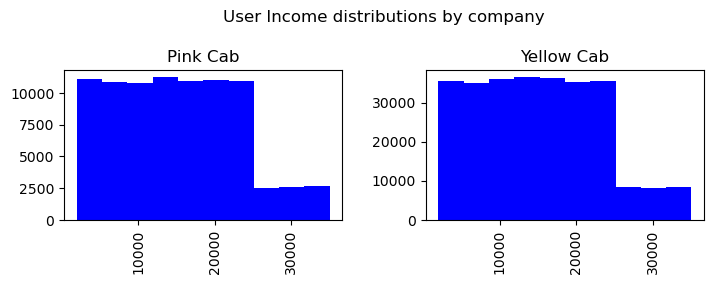

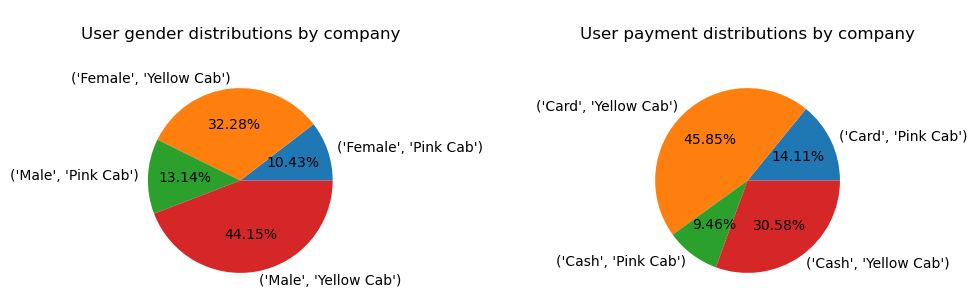

In [40]:
customer_tmp = t_id.merge(c_id, on='C_ID').merge(cab, on='T_ID')
c_tmp = customer_tmp.groupby(['Gender', 'Company'])['Company'].agg('count')
p_tmp = customer_tmp.groupby(['Payment', 'Company'])['Company'].agg('count')

customer_tmp.hist(column=["Age"], by='Company', color='orange', figsize=(8, 2))
plt.suptitle("User Age distributions by company\n", y=1.2)
plt.show()

customer_tmp.hist(column=["Income"], by='Company', color='blue', figsize=(8, 2))
plt.suptitle("User Income distributions by company\n", y=1.2)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

axs[0].pie(c_tmp, labels=c_tmp.index, autopct='%.2f%%')
axs[0].set_title("\nUser gender distributions by company\n")

axs[1].pie(p_tmp, labels=p_tmp.index, autopct='%.2f%%')
axs[1].set_title("\nUser payment distributions by company\n")

plt.show()

#### Assumption: City population
Cities with higher populations have a higher demand for cab services.

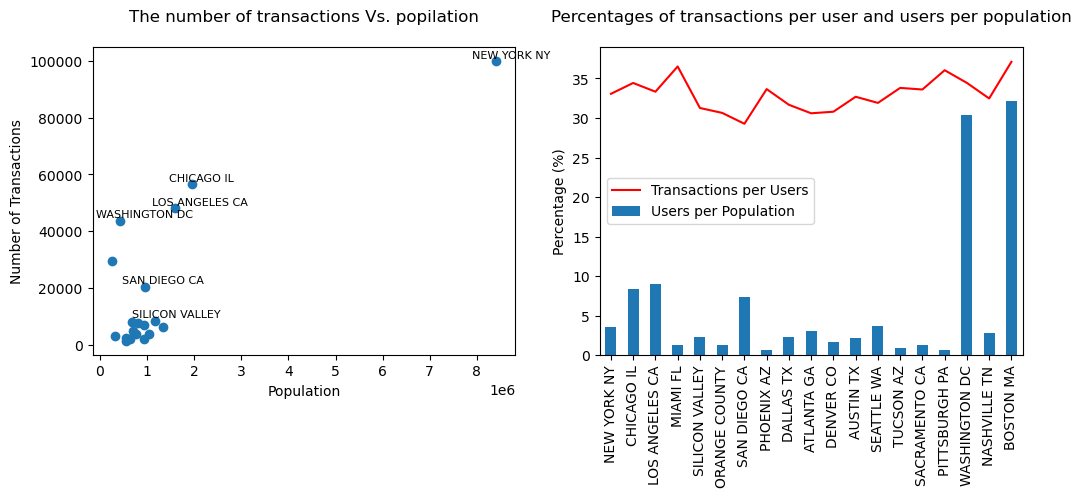

In [41]:
# New df for comparision between cities
tmp = cab.groupby(['City'])['T_ID'].agg('count').reset_index()
t_count = city.merge(tmp, on='City')
t_count = t_count[['City', 'Population', 'Users', 'T_ID']]
t_count.columns = ['City', 'Population', 'Users', 'T_Count']
t_count = t_count.sort_values(by=['T_Count'], ascending=False).reset_index()
t_count['popul_user'] = (t_count['Users'] / t_count['Population']) * 100
t_count['user_trans'] = (t_count['T_Count'] / t_count['Users']) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(t_count['Population'], t_count['T_Count'])
axs[0].set_xlabel('Population')
axs[0].set_ylabel('Number of Transactions')
axs[0].set_title("The number of transactions Vs. popilation\n")

for i, txt in enumerate(t_count['City'][0:7]):
    axs[0].annotate(txt, (t_count['Population'][i]-500000, t_count['T_Count'][i]+1000), fontsize=8)

t_count = t_count.sort_values(by=['Population'], ascending=False).reset_index()
t_count['popul_user'].plot(kind='bar', label='Users per Population', ax=axs[1])
t_count['user_trans'].plot(color='r', label='Transactions per Users', ax=axs[1])
axs[1].set_ylabel('Percentage (%)')
axs[1].set_xticks(np.arange(len(t_count['City'])))
axs[1].set_xticklabels(t_count['City'], rotation='vertical')
axs[1].set_title("Percentages of transactions per user and users per population\n")

plt.legend()
plt.show()

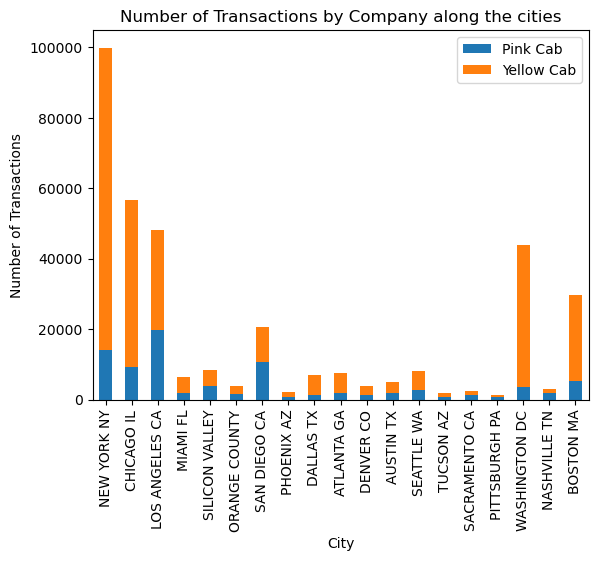

In [42]:
# Creat tmp df for the number of transaction with city and company
tmp = cab.pivot_table(cab, index='City', columns=['Company'], aggfunc='count')
tmp = tmp['T_ID'].reset_index()
tmp = city.merge(tmp, on='City')

tmp.plot(x='City', y=['Pink Cab', 'Yellow Cab'], kind='bar', stacked=True)
plt.title("Number of Transactions by Company along the cities")
plt.ylabel('Number of Transactions')

plt.show()

#### Assumption: Seasonality
There is a significant seasonal effect on the number of customers using cab services.

In [43]:
cab['Year'] = cab['Date'].dt.year
cab['Month'] = cab['Date'].dt.month
cab['Day'] = cab['Date'].dt.day
cab['YearMonth'] = cab['Date'].apply(lambda x:x.strftime('%Y%m'))
# cab['YearMonth']

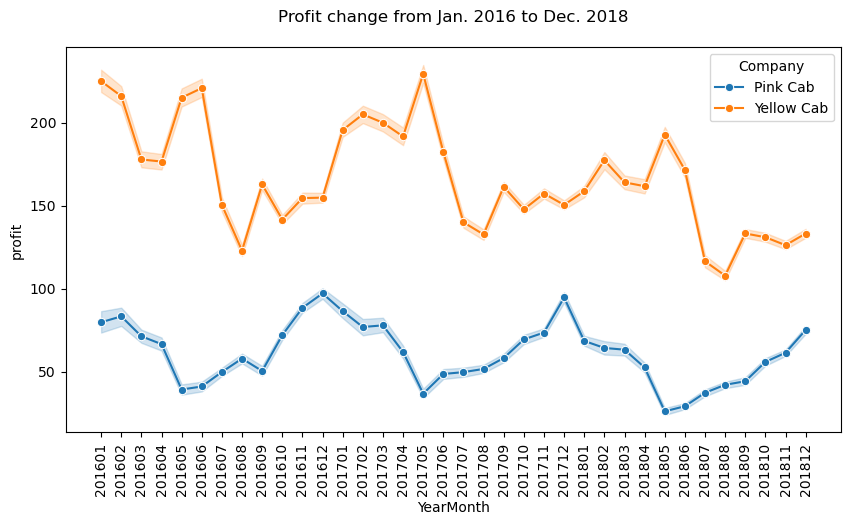

In [44]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='YearMonth', y='profit', hue='Company', data=cab, marker='o')
plt.xticks(rotation='vertical')
plt.title("Profit change from Jan. 2016 to Dec. 2018\n")
plt.show()

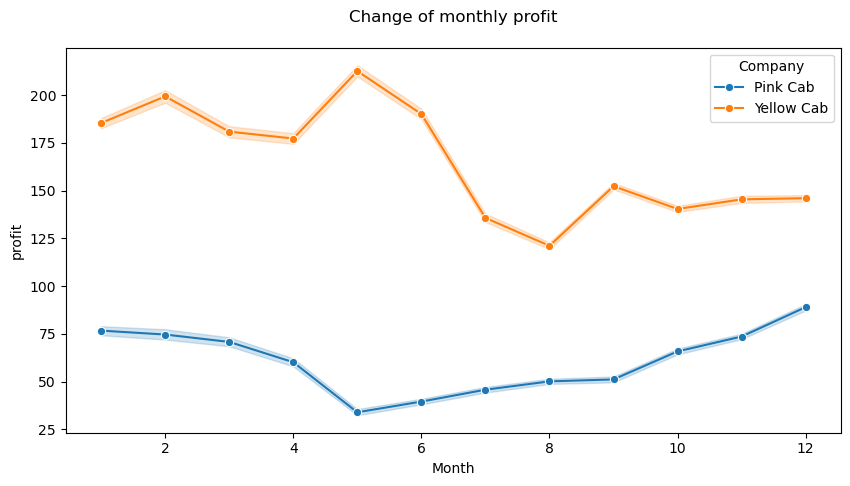

In [45]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='profit', hue='Company', data=cab, marker='o')
plt.title("Change of monthly profit\n")
plt.show()

### Conclusion

Based on the provided context and dataset, we explored the following hypotheses:

In terms of the number of transactions and revenue, Yellow Cab holds a higher market share. Given that the number of unique customers over the three years is not significantly different, we can assume that Yellow Cab's operational capabilities are more efficient.

The histograms of age and income reveal nearly identical patterns for the two companies. Ratios by gender and payment method also demonstrate the same ranking. Therefore, it is reasonable to assume that these specific demographic factors or choices of payment method do not influence customer preferences.

The hypothesis that cities with large populations will exhibit a higher demand for taxi services is notably supported by two cities with small populations: Washington DC and Boston MA. These cities have more than three times the number of users compared to other cities, and Yellow Cab's operating pattern aligns well with these statistics. In other words, in the top five cities by transaction number, the number of Yellow Cabs significantly exceeds that of other companies.

Finally, we estimate that there will be significant seasonal effects on the number of customers using taxi services. Monthly profits over three years exhibit different patterns for the two companies. Yellow Cab records the highest revenue in May and the lowest revenue in August, while Pink Cab shows the lowest revenue in May and the highest revenue in December. Pink Cab's seasonal pattern suggests that many taxis operate in warmer regions. It is predicted that Yellow Cab's patterns will vary depending on the city, and conducting further research on people's movements in specific months may reveal more efficient ways to operate.